# Herron Topic 1 - Practice for Section 02

## Announcements

1. DataCamp
   1. *Data Manipulation with pandas* due by Friday, 2/9, at 11:59 PM
   2. *Joining Data with pandas* due by Friday, 2/16, at 11:59 PM
   3. *Earn 10,000 XP* due by Friday, 3/15, at 11:59 PM
2. I posted Project 1 to Canvas
   1. Slides and notebook due by Friday, 2/23, at 11:59 PM
   2. Keep joining teams and let me know if you need help

## 10-Minute Recap

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf

In [2]:
%precision 4
pd.options.display.float_format = '{:.4f}'.format
%config InlineBackend.figure_format = 'retina'

First, we will use two packages to download data from the web:

1. `yfinance` for Yahoo! Finance data
2. `pandas-datareader` for Ken French data (and FRED data)

Second, there are "simple returns" and "log returns"

1. Simple returns are the returns that investors receive that we learned in FINA 6331 and FINA 6333: $r_t = \frac{p_t + d_t - p_{t-1}}{p_{t-1}}$
3. Log returns are the log of one plus simple returns. Why do we use them?
   1. ***Log returns are additive***, while simple returns are multiplicative. This additive property makes math really easy with log returns: $\log(\prod_{t=0}^T (1 + r_t)) = \sum_{t=0}^T \log(1+r_t)$, so $r_{0,T} = \prod_{t=0}^T (1 + r_t) - 1 = e^{\sum_{t=0}^T \log(1+r_t)} - 1$
   2. ***Log returns are almost normally distributed***
  
***We will almost always use simple returns.***
The exeception is time-consuming calculations, which we will often do in log returns to save us time.

Third, we can calculate portfolio returns a few ways

1. We can calculate equally-weighted returns with `returns.mean(axis=1)`, ***rebalanced at the same frequency as returns***
2. We can calculate any-weighted with `returns.dot(weights)`, where `weights` is an array of portfolio weights that are not necessarily equally-weighted, still ***rebalanced at the same frequency as returns***

## Practice

### Download all available daily price data for tickers TSLA, F, AAPL, AMZN, and META to data frame `prices`

In [3]:
tickers = 'TSLA F AAPL AMZN META'
# tickers = ['TSLA', 'F',  'AAPL', 'AMZN', 'META']
prices = yf.download(tickers=tickers)

prices

[*********************100%%**********************]  5 of 5 completed


Adj Close                                       Close           \
                AAPL     AMZN       F     META     TSLA     AAPL     AMZN   
Date                                                                        
1972-06-01       NaN      NaN  0.2419      NaN      NaN      NaN      NaN   
1972-06-02       NaN      NaN  0.2414      NaN      NaN      NaN      NaN   
1972-06-05       NaN      NaN  0.2414      NaN      NaN      NaN      NaN   
1972-06-06       NaN      NaN  0.2387      NaN      NaN      NaN      NaN   
1972-06-07       NaN      NaN  0.2373      NaN      NaN      NaN      NaN   
...              ...      ...     ...      ...      ...      ...      ...   
2024-02-02  185.8500 171.8100 12.1400 474.9900 187.9100 185.8500 171.8100   
2024-02-05  187.6800 170.3100 11.5900 459.4100 181.0600 187.6800 170.3100   
2024-02-06  189.3000 169.1500 12.0700 454.7200 185.1000 189.3000 169.1500   
2024-02-07  189.4100 170.5300 12.8000 469.5900 187.5800 189.4100 170.5300   
2024-02-08  188.3200 169.8400 12.8300 470.0000 189.5600 188.3200 169.8400   

                                      ...     Open                            \
                 F     META     TSLA  ...     AAPL     AMZN       F     META   
Date                                  ...                                      
1972-06-01  2.1532      NaN      NaN  ...      NaN      NaN  0.0000      NaN   
1972-06-02  2.1492      NaN      NaN  ...      NaN      NaN  2.1532      NaN   
1972-06-05  2.1492      NaN      NaN  ...      NaN      NaN  2.1492      NaN   
1972-06-06  2.1248      NaN      NaN  ...      NaN      NaN  2.1492      NaN   
1972-06-07  2.1127      NaN      NaN  ...      NaN      NaN  2.1248      NaN   
...            ...      ...      ...  ...      ...      ...     ...      ...   
2024-02-02 12.1400 474.9900 187.9100  ... 179.8600 169.1900 12.0300 459.6000   
2024-02-05 11.5900 459.4100 181.0600  ... 188.1500 170.2000 12.0100 469.8800   
2024-02-06 12.0700 454.7200 185.1000  ... 186.8600 169.3900 11.6400 464.0000   
2024-02-07 12.8000 469.5900 187.5800  ... 190.6400 169.4800 12.7300 458.0000   
2024-02-08 12.8300 470.0000 189.5600  ... 189.3850 169.6500 12.8700 468.3200   

                            Volume                                          \
               TSLA           AAPL           AMZN          F          META   
Date                                                                         
1972-06-01      NaN            NaN            NaN    1091238           NaN   
1972-06-02      NaN            NaN            NaN    1174468           NaN   
1972-06-05      NaN            NaN            NaN    5209582           NaN   
1972-06-06      NaN            NaN            NaN    1424158           NaN   
1972-06-07      NaN            NaN            NaN     675088           NaN   
...             ...            ...            ...        ...           ...   
2024-02-02 185.0400 102518000.0000 117154900.0000   73087000 84615500.0000   
2024-02-05 184.2600  69668800.0000  55081300.0000   81026800 40832400.0000   
2024-02-06 177.2100  43490800.0000  42505500.0000   98636800 21655200.0000   
2024-02-07 188.1800  53439000.0000  47174100.0000  137224000 23066000.0000   
2024-02-08 189.0000  39248768.0000  41986288.0000   68064947 18781491.0000   

                           
                     TSLA  
Date                       
1972-06-01            NaN  
1972-06-02            NaN  
1972-06-05            NaN  
1972-06-06            NaN  
1972-06-07            NaN  
...                   ...  
2024-02-02 110505100.0000  
2024-02-05 134294400.0000  
2024-02-06 122676000.0000  
2024-02-07 111535200.0000  
2024-02-08  82734654.0000  

[13034 rows x 30 columns]

### Calculate all available daily returns and save to data frame `returns`

In [4]:
returns = (
    prices['Adj Close'] # slice adj close
    .iloc[:-1] # drop the last price because it might be intraday (i.e., not a close)
    .pct_change() # calculate simple returns
)

returns

,AAPL,AMZN,F,META,TSLA
Date,,,,,
1972-06-01,NaN,NaN,NaN,NaN,NaN
1972-06-02,NaN,NaN,-0.0019,NaN,NaN
1972-06-05,NaN,NaN,0.0000,NaN,NaN
1972-06-06,NaN,NaN,-0.0113,NaN,NaN
1972-06-07,NaN,NaN,-0.0057,NaN,NaN
...,...,...,...,...,...
2024-02-01,0.0133,0.0263,0.0324,0.0119,0.0084
2024-02-02,-0.0054,0.0787,0.0033,0.2032,-0.0050
2024-02-05,0.0098,-0.0087,-0.0453,-0.0328,-0.0365


### Slices returns for the 2020s and assign to `returns_2020s`

In [5]:
returns_2020s = returns.loc['2020':] # always use an unambiguos date format, like YYYY-MM-DD

returns_2020s

,AAPL,AMZN,F,META,TSLA
Date,,,,,
2020-01-02,0.0228,0.0272,0.0129,0.0221,0.0285
2020-01-03,-0.0097,-0.0121,-0.0223,-0.0053,0.0296
2020-01-06,0.0080,0.0149,-0.0054,0.0188,0.0193
2020-01-07,-0.0047,0.0021,0.0098,0.0022,0.0388
2020-01-08,0.0161,-0.0078,0.0000,0.0101,0.0492
...,...,...,...,...,...
2024-02-01,0.0133,0.0263,0.0324,0.0119,0.0084
2024-02-02,-0.0054,0.0787,0.0033,0.2032,-0.0050
2024-02-05,0.0098,-0.0087,-0.0453,-0.0328,-0.0365


---

What if we want a more complicated slice?
We can combine `.loc[]` and Boolean conditions!

In [6]:
returns.loc[
    (returns.index.year == 2020) &
    ((returns.index.month == 1) | (returns.index.month == 12))
]

,AAPL,AMZN,F,META,TSLA
Date,,,,,
2020-01-02,0.0228,0.0272,0.0129,0.0221,0.0285
2020-01-03,-0.0097,-0.0121,-0.0223,-0.0053,0.0296
2020-01-06,0.0080,0.0149,-0.0054,0.0188,0.0193
2020-01-07,-0.0047,0.0021,0.0098,0.0022,0.0388
2020-01-08,0.0161,-0.0078,0.0000,0.0101,0.0492
2020-01-09,0.0212,0.0048,0.0011,0.0143,-0.0219
2020-01-10,0.0023,-0.0094,-0.0011,-0.0011,-0.0066
2020-01-13,0.0214,0.0043,-0.0011,0.0177,0.0977
2020-01-14,-0.0135,-0.0116,0.0054,-0.0128,0.0249


---

### Download all available data for the Fama and French daily benchmark factors to dictionary `ff_all`

I often use the following code snippet to find the exact name for the the daily benchmark factors file.

In [7]:
pdr.famafrench.get_available_datasets()[:5]

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily']

In [8]:
ff_all = pdr.DataReader(
    name='F-F_Research_Data_Factors_daily',
    data_source='famafrench',
    start='1900'
)

C:\Users\r.herron\AppData\Local\Temp\ipykernel_320\2526882917.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_all = pdr.DataReader(


The `DESCR` key in the dictionary tells us about the data frames that `pandas-datareader` returns.

In [9]:
print(ff_all['DESCR'])

F-F Research Data Factors daily
-------------------------------

This file was created by CMPT_ME_BEME_RETS_DAILY using the 202312 CRSP database. The Tbill return is the simple daily rate that, over the number of trading days in the month, compounds to 1-month TBill rate from Ibbotson and Associates Inc. Copyright 2023 Kenneth R. French

  0 : (25649 rows x 4 cols)


### Slice the daily benchmark factors, convert them to decimal returns, and assign to `ff`

In [10]:
ff = ff_all[0].div(100)

ff

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-01,0.0010,-0.0025,-0.0027,0.0001
1926-07-02,0.0045,-0.0033,-0.0006,0.0001
1926-07-06,0.0017,0.0030,-0.0039,0.0001
1926-07-07,0.0009,-0.0058,0.0002,0.0001
1926-07-08,0.0021,-0.0038,0.0019,0.0001
...,...,...,...,...
2023-12-22,0.0021,0.0064,0.0009,0.0002
2023-12-26,0.0048,0.0069,0.0046,0.0002
2023-12-27,0.0016,0.0014,0.0012,0.0002


### Use the `.cumprod()` method to plot cumulative returns for these stocks in the 2020s

We use the `.prod()` method to calculate *total* returns, because $r_{total} = r_{0,T} = \left[ \prod_{t=0}^T (1 + r_t) \right] -1$.

In [11]:
totret = (
    returns_2020s # returns during the 2020s
    .add(1) # add 1 before we compound
    .prod() # compound all returns
    .sub(1) # subtract 1 to recover total returns
)

totret

AAPL   1.6483
AMZN   0.8457
F      0.6052
META   1.2879
TSLA   5.7260
dtype: float64

In [12]:
cumret_cumprod = returns_2020s.add(1).cumprod().sub(1)

The last row in the cumulative returns data frame `cumret_cumprod` is the same as the total returns series `totret`!

In [13]:
np.allclose(totret, cumret_cumprod.iloc[-1])

True

We can use the `.plot()` method to plot these cumulative returns!

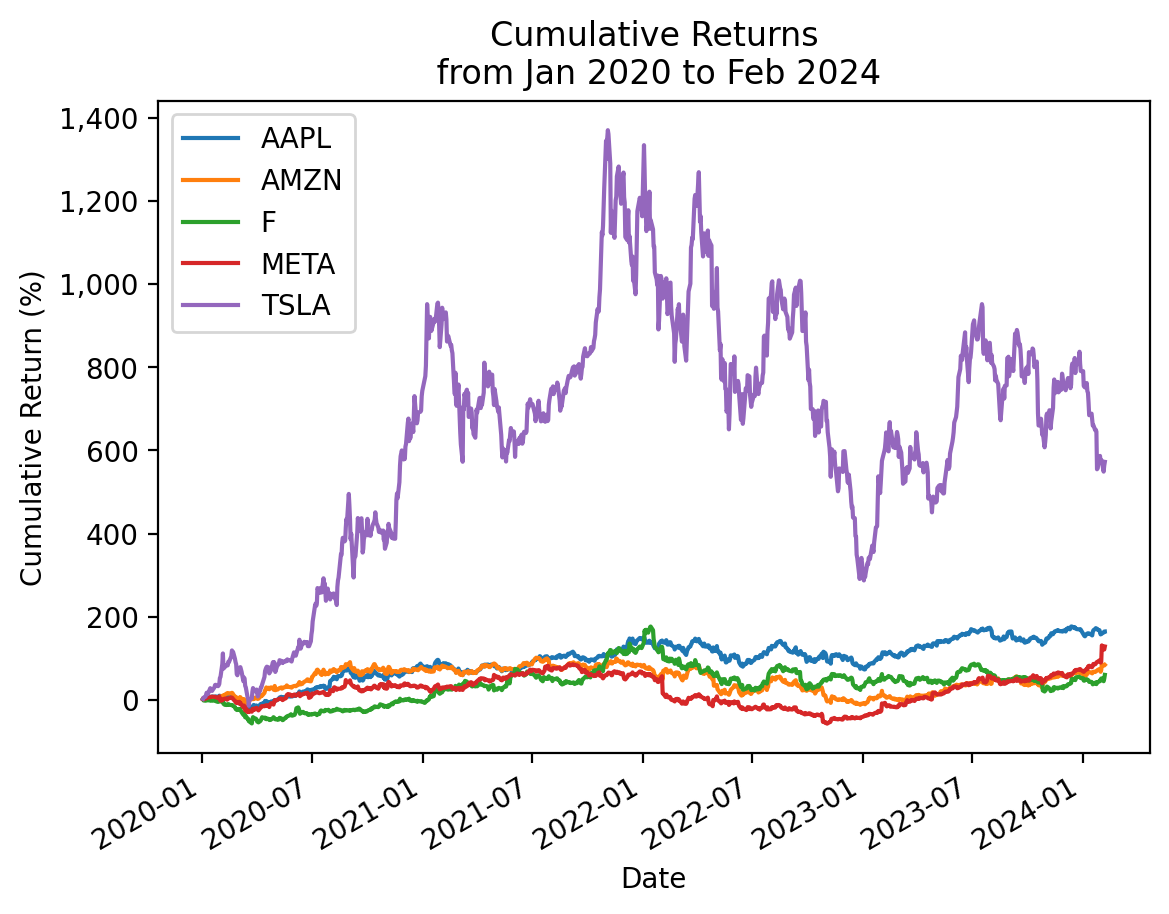

In [14]:
cumret_cumprod.mul(100).plot()

# https://stackoverflow.com/questions/25973581/how-to-format-axis-number-format-to-thousands-with-a-comma
from matplotlib import ticker
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.ylabel('Cumulative Return (%)')
plt.title(f'Cumulative Returns\n from {cumret_cumprod.index.min():%b %Y} to {cumret_cumprod.index.max():%b %Y}')
plt.show()

We can also `plt.plot()`, but lose a few of the formatting defaults built into the pandas method `.plot()`.

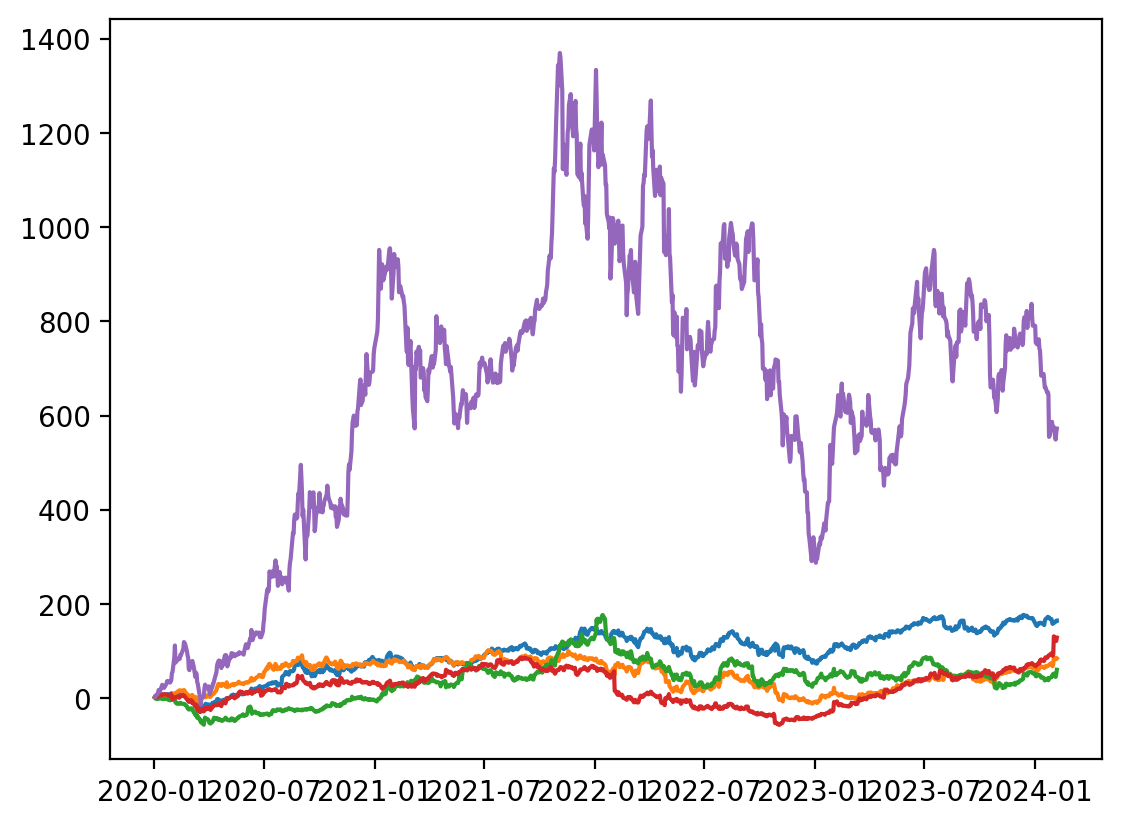

In [15]:
plt.plot(cumret_cumprod.mul(100))

### Use the `.cumsum()` method with log returns to plot cumulative returns for these stocks in the 2020s

In [16]:
cumret_cumsum = (
    returns_2020s
    .pipe(np.log1p) # converts simple returns to log returns
    .cumsum() # log returns are additive
    .pipe(np.expm1) # converts log returns to simple returns
)
# cumret_cumsum = returns_2020s.add(1).pipe(np.log).cumsum().pipe(np.exp).sub(1)

In [17]:
np.allclose(totret, cumret_cumsum.iloc[-1])

True

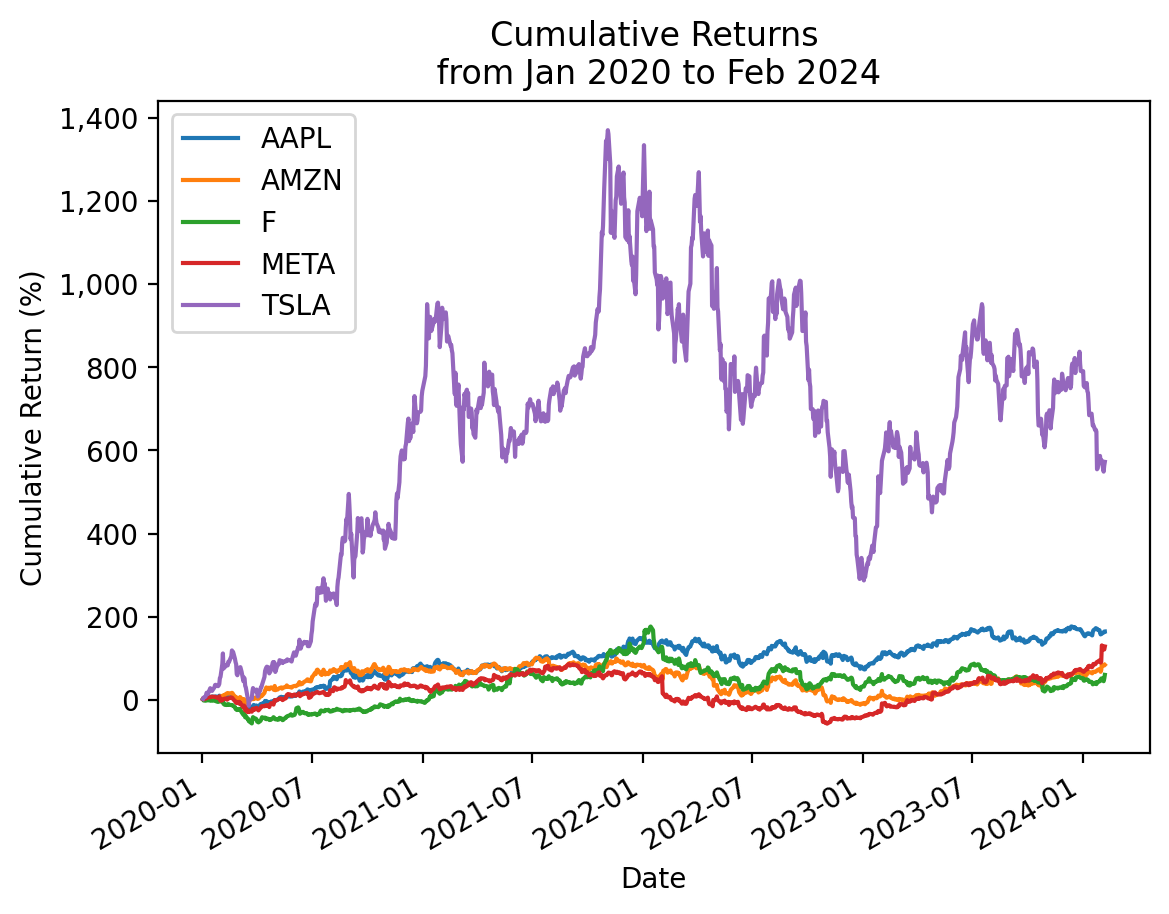

In [18]:
cumret_cumsum.mul(100).plot()

# https://stackoverflow.com/questions/25973581/how-to-format-axis-number-format-to-thousands-with-a-comma
from matplotlib import ticker
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.ylabel('Cumulative Return (%)')
plt.title(f'Cumulative Returns\n from {cumret_cumsum.index.min():%b %Y} to {cumret_cumsum.index.max():%b %Y}')
plt.show()

### Use price data only to plot cumulative returns for these stocks in the 2020s

We can also calculate cumulative returns as the ratio of adjusted closed.
That is $R_{0,T} = \frac{AC_T}{AC_0} - 1$.

In [19]:
returns_2020s.iloc[0]

AAPL   0.0228
AMZN   0.0272
F      0.0129
META   0.0221
TSLA   0.0285
Name: 2020-01-02 00:00:00, dtype: float64

In [20]:
cumret_prices = prices['Adj Close'].loc['2020':].iloc[:-1] / prices['Adj Close'].loc['2019'].iloc[-1] - 1

cumret_prices.iloc[0]

AAPL   0.0228
AMZN   0.0272
F      0.0129
META   0.0221
TSLA   0.0285
Name: 2020-01-02 00:00:00, dtype: float64

In [21]:
np.allclose(cumret_cumprod, cumret_prices)

True

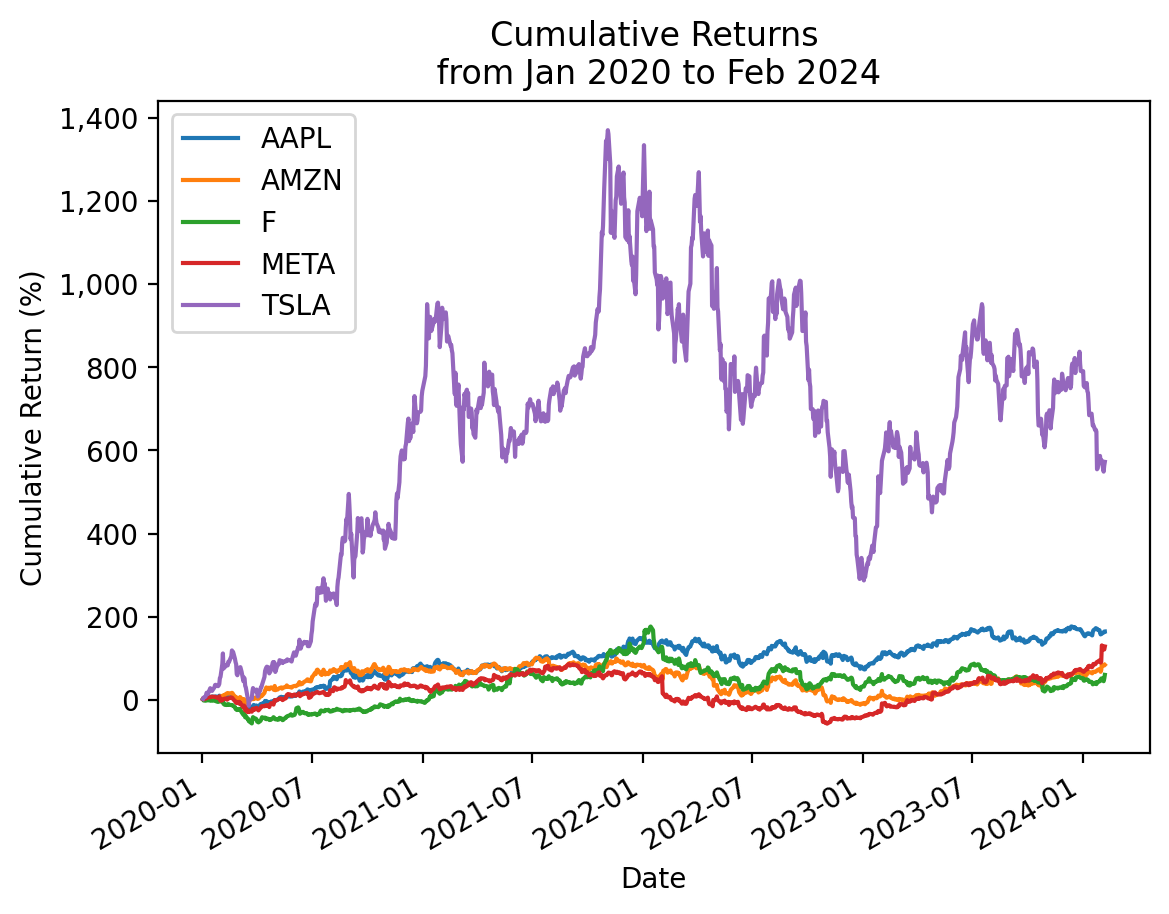

In [22]:
cumret_prices.mul(100).plot()

# https://stackoverflow.com/questions/25973581/how-to-format-axis-number-format-to-thousands-with-a-comma
from matplotlib import ticker
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.ylabel('Cumulative Return (%)')
plt.title(f'Cumulative Returns\n from {cumret_prices.index.min():%b %Y} to {cumret_prices.index.max():%b %Y}')
plt.show()

### Calculate the Sharpe Ratio for TSLA

In [23]:
returns['TSLA'].describe()

count   3425.0000
mean       0.0020
std        0.0358
min       -0.2106
25%       -0.0156
50%        0.0012
75%        0.0193
max        0.2440
Name: TSLA, dtype: float64

In [24]:
ff['RF'].describe()

count   25649.0000
mean        0.0001
std         0.0001
min        -0.0000
25%         0.0000
50%         0.0001
75%         0.0002
max         0.0006
Name: RF, dtype: float64

Calculate the Sharpe Ratio with all available returns and 2020s returns.
Recall the Sharpe Ratio is $\frac{\overline{R_i - R_f}}{\sigma_i}$, where $\sigma_i$ is the volatility of *excess* returns.

***I suggest you write a function named `calc_sharpe()` to use for the rest of this notebook.***

In [25]:
def calc_sharpe(ri, rf=ff['RF'], ppy=252):
    ri_rf = ri.sub(rf).dropna()
    return np.sqrt(ppy) * ri_rf.mean() / ri_rf.std()

In [26]:
calc_sharpe(ri=returns['TSLA'])

0.9261

We can use the `.pipe()` method here, too, since `ri` is the first argument to `calc_sharpe()`!

In [27]:
returns['TSLA'].pipe(calc_sharpe)

0.9261

### Calculate the market beta for TSLA

Calculate the market beta with all available returns and 2020s returns.
Recall we estimate market beta with the ordinary least squares (OLS) regression $R_i-R_f = \alpha + \beta (R_m-R_f) + \epsilon$.
We can estimate market beta with the covariance formula (i.e., $\beta_i = \frac{Cov(R_i - R_f, R_m - R_f)}{Var(R_m-R_f)}$) above for a univariate regression if we do not need goodness of fit statistics.

***I suggest you write a function named `calc_beta()` to use for the rest of this notebook.***

In [28]:
def calc_beta(ri, rf=ff['RF'], rm_rf=ff['Mkt-RF']):
    ri_rf = ri.sub(rf).dropna()
    rm_rf = rm_rf.loc[ri_rf.index]
    return ri_rf.cov(rm_rf) / rm_rf.var()

In [29]:
calc_beta(ri=returns['TSLA'])

1.4417

We can use the `.pipe()` method here, too, since `ri` is the first argument to `calc_beta()`!

In [30]:
returns['TSLA'].pipe(calc_beta)

1.4417

### Guess the Sharpe Ratios for these stocks in the 2020s

### Guess the market betas for these stocks in the 2020s

### Calculate the Sharpe Ratios for these stocks in the 2020s

How good were your guesses?

In [31]:
for i in returns_2020s:
    sharpe_i = returns_2020s[i].pipe(calc_sharpe)
    print(f'Sharpe Ratio for {i}:\t {sharpe_i:0.2f}')

Sharpe Ratio for AAPL:	 0.86
Sharpe Ratio for AMZN:	 0.48
Sharpe Ratio for F:	 0.42
Sharpe Ratio for META:	 0.49
Sharpe Ratio for TSLA:	 1.12


We can also use pandas notation to vectorize this calculation.
First calculate *excess* returns as $r_i - r_f$.

In [32]:
returns_2020s_excess = returns_2020s.sub(ff['RF'], axis=0).dropna()

Then use pandas notation to calculate means, standard deviations, and annualize.

In [33]:
(
    returns_2020s_excess
    .mean()
    .div(returns_2020s_excess.std())
    .mul(np.sqrt(252))
)

AAPL   0.8576
AMZN   0.4750
F      0.4240
META   0.4949
TSLA   1.1212
dtype: float64

***Note:***
In a few weeks we will learn the `.apply()` method, which avoids the loop syntax.

In [34]:
returns_2020s.apply(calc_sharpe)

AAPL   0.8576
AMZN   0.4750
F      0.4240
META   0.4949
TSLA   1.1212
dtype: float64

### Calculate the market betas for these stocks in the 2020s

How good were your guesses?

In [35]:
for i in returns_2020s:
    beta_i = returns_2020s[i].pipe(calc_beta)
    print(f'Beta for {i}:\t {beta_i:0.2f}')

Beta for AAPL:	 1.15
Beta for AMZN:	 1.04
Beta for F:	 1.22
Beta for META:	 1.27
Beta for TSLA:	 1.58


Or we can follow out approach above to vectorize this calculation.
First, we need to add a market excess return column to `returns_2020s_excess`.

In [36]:
returns_2020s_excess['Mkt-RF'] = ff['Mkt-RF']
returns_2020s_excess.head()

,AAPL,AMZN,F,META,TSLA,Mkt-RF
Date,,,,,,
2020-01-02,0.0228,0.0271,0.0128,0.0220,0.0285,0.0086
2020-01-03,-0.0098,-0.0122,-0.0224,-0.0054,0.0296,-0.0067
2020-01-06,0.0079,0.0148,-0.0055,0.0188,0.0192,0.0036
2020-01-07,-0.0048,0.0020,0.0098,0.0021,0.0387,-0.0019
2020-01-08,0.0160,-0.0079,-0.0001,0.0101,0.0491,0.0047


In [37]:
vcv = returns_2020s_excess.cov()
vcv

,AAPL,AMZN,F,META,TSLA,Mkt-RF
AAPL,0.0004,0.0003,0.0002,0.0004,0.0005,0.0003
AMZN,0.0003,0.0006,0.0002,0.0004,0.0005,0.0002
F,0.0002,0.0002,0.0009,0.0003,0.0005,0.0003
META,0.0004,0.0004,0.0003,0.0009,0.0005,0.0003
TSLA,0.0005,0.0005,0.0005,0.0005,0.0018,0.0003
Mkt-RF,0.0003,0.0002,0.0003,0.0003,0.0003,0.0002


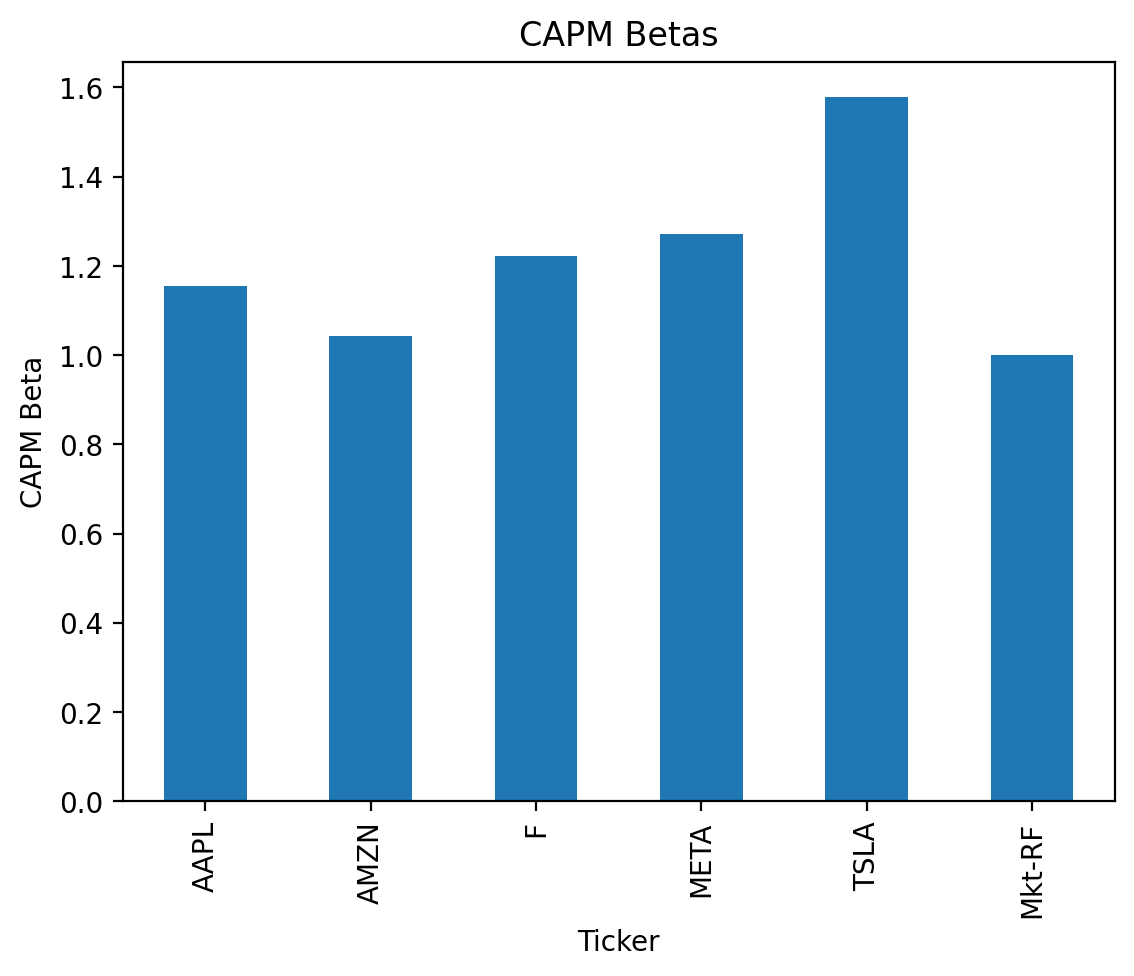

In [38]:
vcv['Mkt-RF'].div(vcv.loc['Mkt-RF', 'Mkt-RF']).plot(kind='bar')
plt.xlabel('Ticker')
plt.ylabel('CAPM Beta')
plt.title('CAPM Betas')
plt.show()

***Note:***
In a few weeks we will learn the `.apply()` method, which avoids the loop syntax.

In [39]:
returns_2020s.apply(calc_beta)

AAPL   1.1541
AMZN   1.0429
F      1.2231
META   1.2710
TSLA   1.5780
dtype: float64

### Calculate the Sharpe Ratio for an *equally weighted* portfolio of these stocks in the 2020s

What do you notice?

In [40]:
returns_2020s.mean(axis=1).pipe(calc_sharpe)

0.9573

Because diversification reduces portfolio standard deviation less than the sum of its parts, the Sharpe Ratio of the equally weighted portfolio is less than the equally weighted mean of the single-stock Sharpe Ratios.

### Calculate the market beta for an *equally weighted* portfolio of these stocks in the 2020s

What do you notice?

Beta measures *non*diversifiable risk, so $\beta_P = \sum w_i \beta_i$!

In [41]:
returns_2020s.mean(axis=1).pipe(calc_beta)

1.2538

In [42]:
returns_2020s.apply(calc_beta).mean()

1.2538

### Calculate the market betas for these stocks every calendar year for every possible year

Save these market betas to data frame `betas`.
Our current Python knowledge limits us to a for-loop, but we will learn easier and faster approaches soon!

In [43]:
betas = pd.DataFrame(
    index=range(1972, 2024),
    columns=returns.columns
)

betas.columns.name = 'Ticker'
betas.index.name = 'Year'

betas.tail()

Ticker,AAPL,AMZN,F,META,TSLA
Year,,,,,
2019,NaN,NaN,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN,NaN
2021,NaN,NaN,NaN,NaN,NaN
2022,NaN,NaN,NaN,NaN,NaN
2023,NaN,NaN,NaN,NaN,NaN


In [44]:
for i in betas.index: 
    for c in betas.columns:
        betas.at[i, c] = returns.loc[str(i), c].pipe(calc_beta)

betas.tail()

Ticker,AAPL,AMZN,F,META,TSLA
Year,,,,,
2019,1.4751,1.2752,1.0733,1.2094,1.3262
2020,1.1174,0.6866,1.1052,0.9913,1.3041
2021,1.1957,0.9822,1.2396,1.2014,1.9891
2022,1.2386,1.5922,1.3824,1.6843,1.7414
2023,1.0369,1.4649,1.3947,1.6630,2.2218


### Plot the time series of market betas

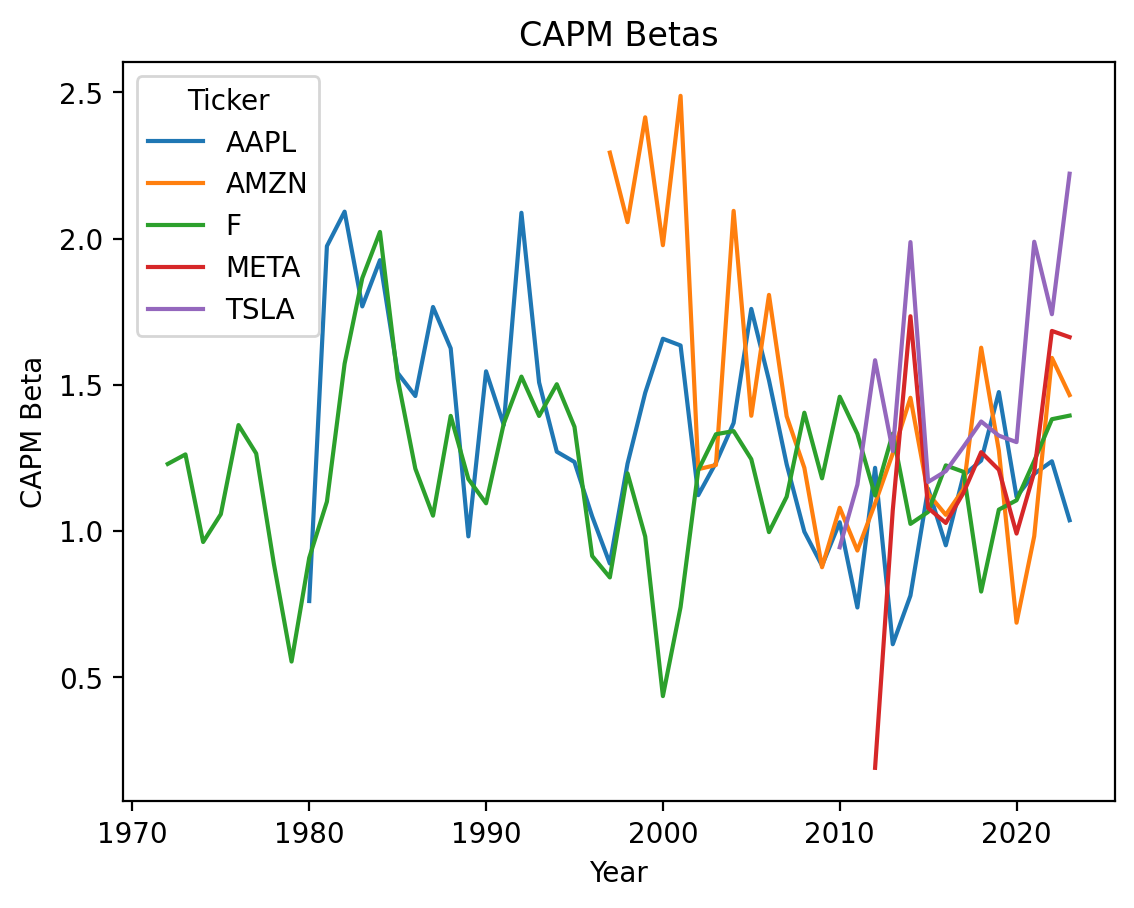

In [45]:
betas.plot()
plt.ylabel('CAPM Beta')
plt.title('CAPM Betas')
plt.show()